## Dataset Overview

The process of the design and development of the visualization product will be based on the datasets of the non-profit organization Kiva of the three months data: from April 26, 2017 to July 26, 2017, which is obtained from the Kaggle portal (Kiva Crowdfunding Dataset, 2018).
The received data consists of four datasets:
•	the first dataset contains most of the data about loans (kiva_loans.csv);
•	the second dataset covers information about regions with MPI (Multidimensional Poverty Index) (kiva_mpi_region_locations.csv);
•	the other two datasets hold statistics about the types of loans and the distribution by region (loan_theme_ids.csv, loan_themes_by_region.csv).
The main dataset includes 20 variables (kiva_loans.csv): 10 variables are categorical, 6 variables are numeric, the rest are string variables and 47 076 observations. 

The dataset available by this link: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/


## 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tools
import plotly.offline as ply
ply.init_notebook_mode(connected=True)
import seaborn as sns 
color = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Reading Datasets

In [4]:
loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")
theme = pd.read_csv("loan_theme_ids.csv")
theme_region = pd.read_csv("loan_themes_by_region.csv")

## 3 Data pre-processing and data cleansing

In [5]:
## The project must display three months’ worth of data.

df_loans = loans.drop(labels=range(0, 624129), axis=0)

In [6]:
# Loans

print(df_loans.shape)

# number of rows

print(len(df_loans))

(47076, 20)
47076


In [7]:
# NAs
df_loans.isnull().sum()

id                       0
funded_amount            0
loan_amount              0
activity                 0
sector                   0
use                     39
country_code             0
country                  0
region                2355
currency                 0
partner_id             448
posted_time              0
disbursed_time         273
funded_time           8027
term_in_months           0
lender_count             0
tags                  6966
borrower_genders        39
repayment_interval       0
date                     0
dtype: int64

<AxesSubplot:>

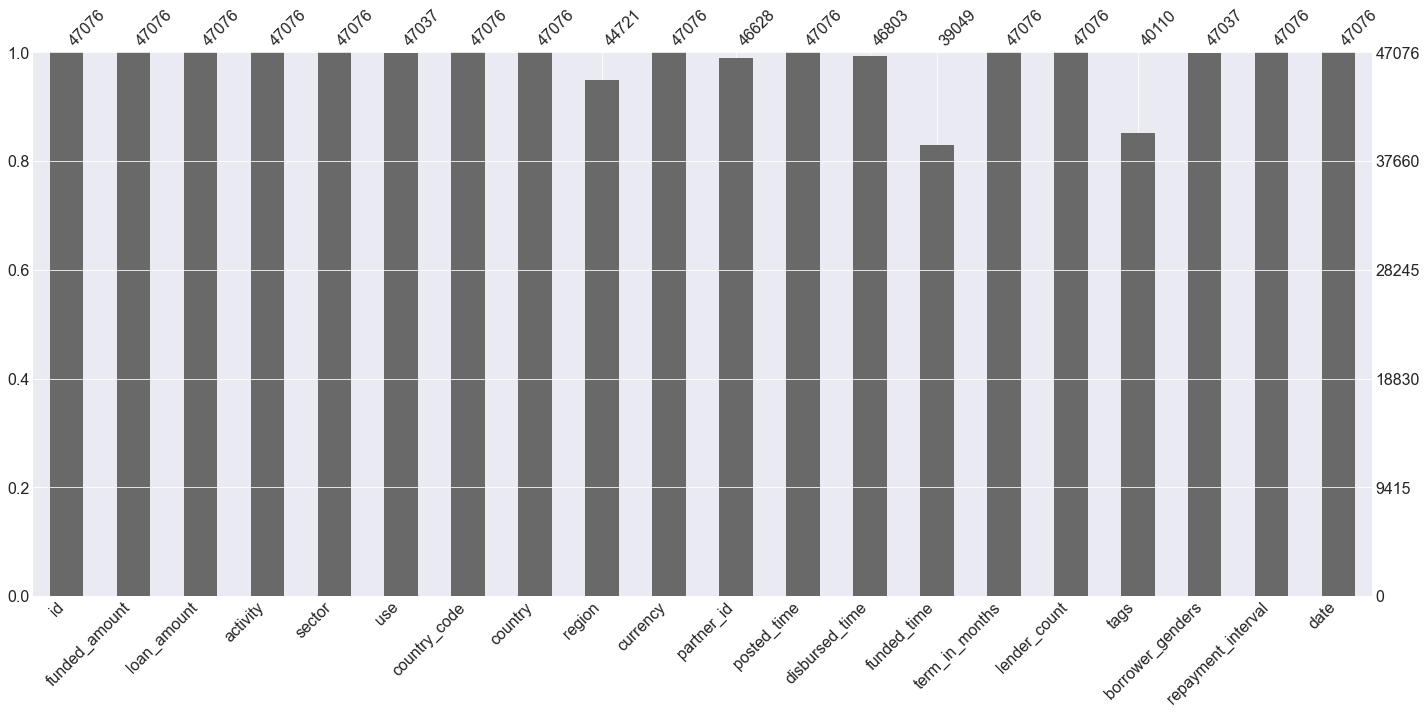

In [8]:
# plotting of NAs
msno.bar(df_loans)

<AxesSubplot:>

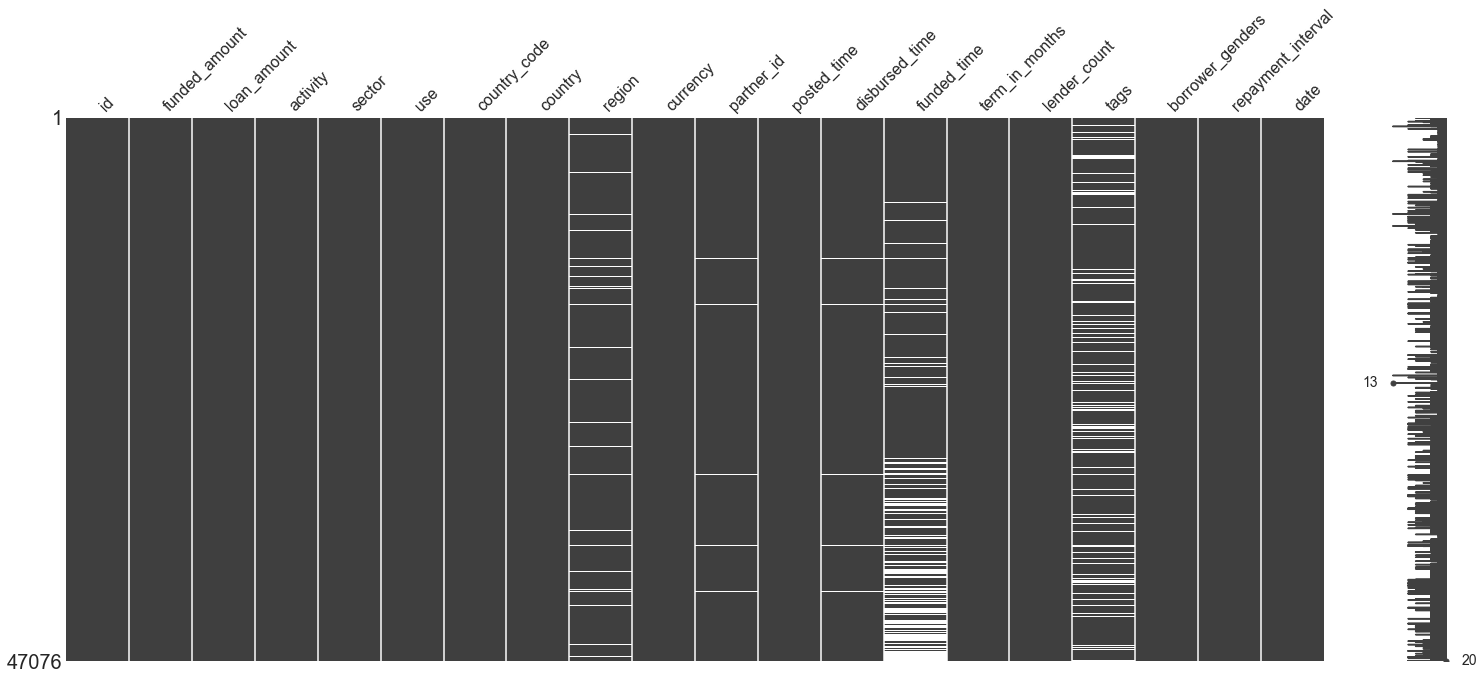

In [9]:
# plotting of NAs - matrix plot
msno.matrix(df_loans)

In [10]:
## Removing NA volumns
df_loans.dropna(inplace=True)

In [11]:
# Checking NAs
df_loans.isnull().sum()

id                    0
funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
partner_id            0
posted_time           0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
tags                  0
borrower_genders      0
repayment_interval    0
date                  0
dtype: int64

## DATA VISUALIZATION SECTION

## 4. Static Charts Using Matplotlib and Seaborn Libraries

## 4.1. Localisation of borrowers by country

In [12]:
## Number of loans by country
countries = df_loans['country'].value_counts()[df_loans['country'].value_counts(normalize=True)> 0.005]
countries.head()

Philippines    7931
Cambodia       3067
Kenya          2862
Pakistan       1572
Tajikistan     1217
Name: country, dtype: int64

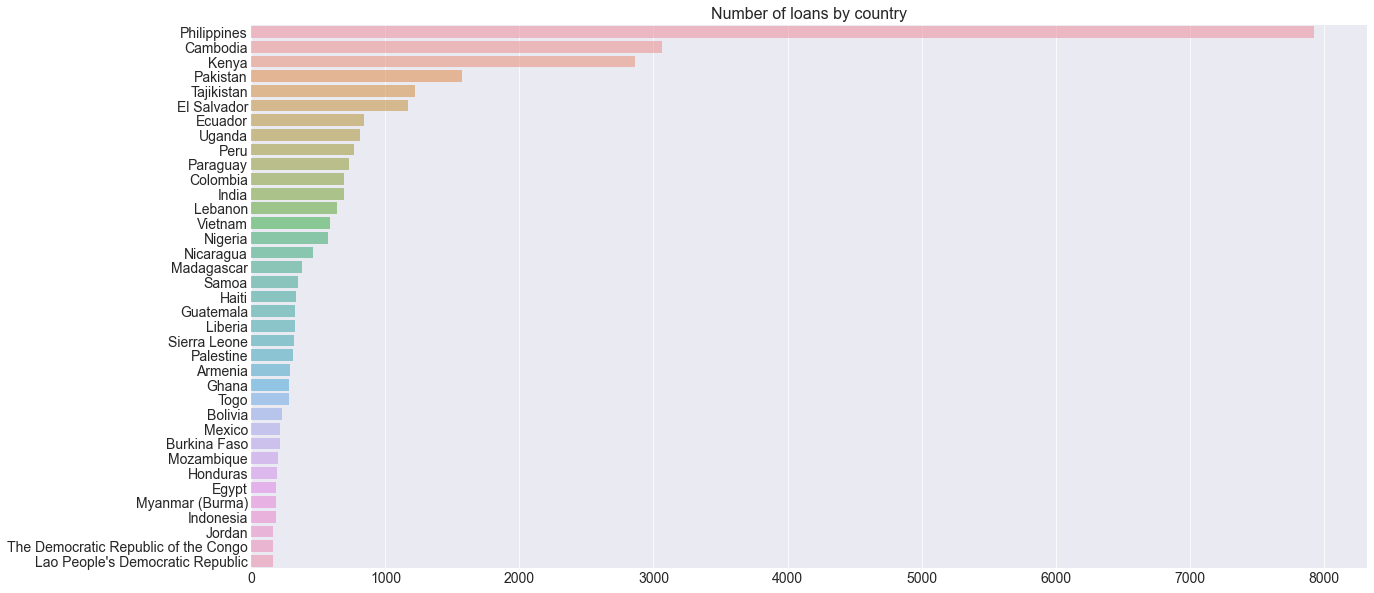

In [13]:
## plot building using matplotlib and seaborn libraries
plt.figure(figsize=(20,10))
plt.title("Number of loans by country", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

## 4.2. Bar Chart for Regions

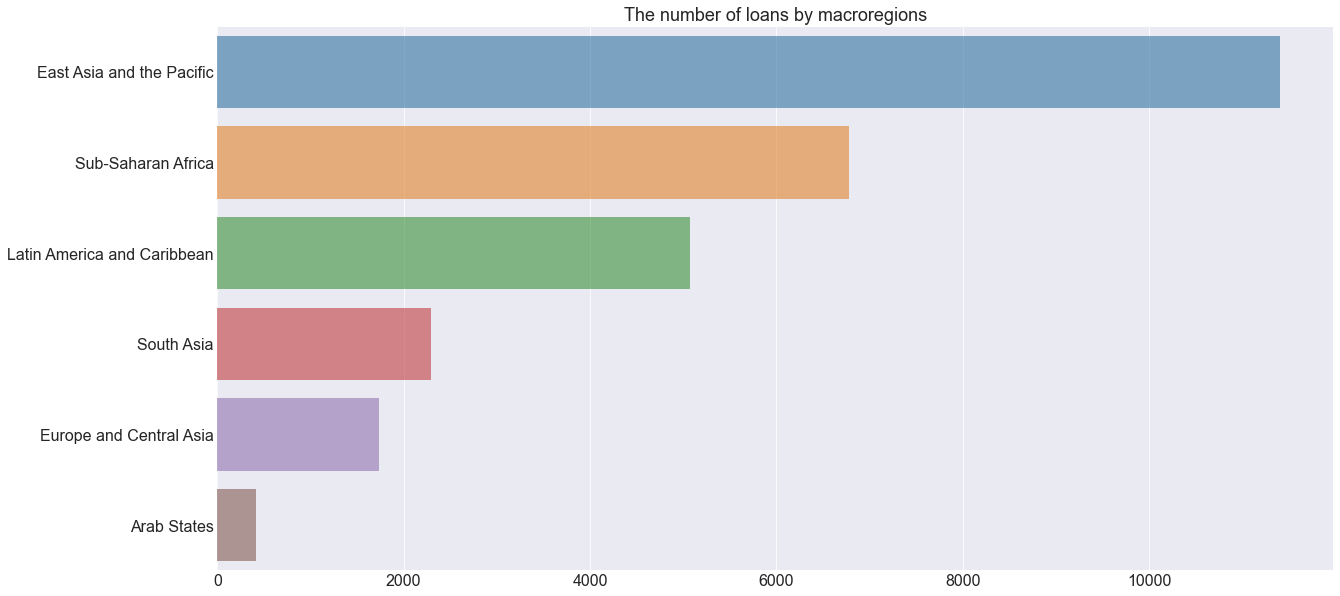

In [14]:
## grouping MPI index by mean
df_mpi= df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()
## merge two dataframe into one dataframe called df_loans_region
df_loans_region = df_loans.merge(df_mpi, how='left', on='country')
regions = df_loans_region['world_region'].value_counts()
regions_list = regions.index.to_list()
## grouping the number of loans by macroregions
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("The number of loans by macroregions", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

## 4.4. Loans by sector

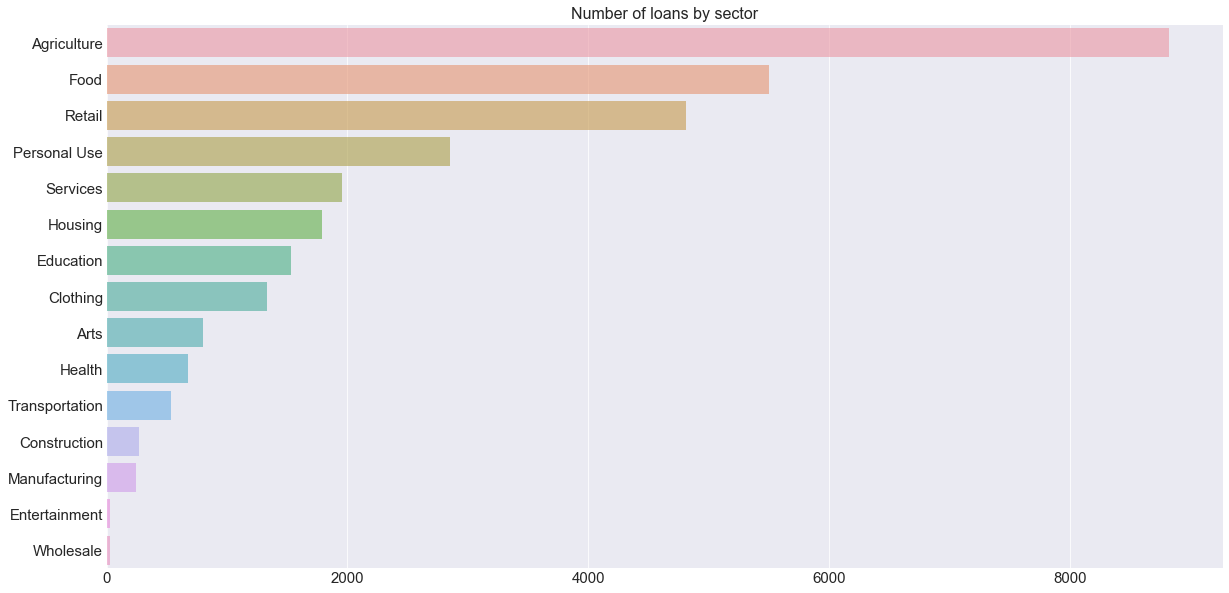

In [15]:
## Number of loans by sector
sectors = df_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Number of loans by sector", fontsize=16)
# plt.xlabel('Number of loans', fontsize=16)
# plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

## 4.5. Loans by Activity

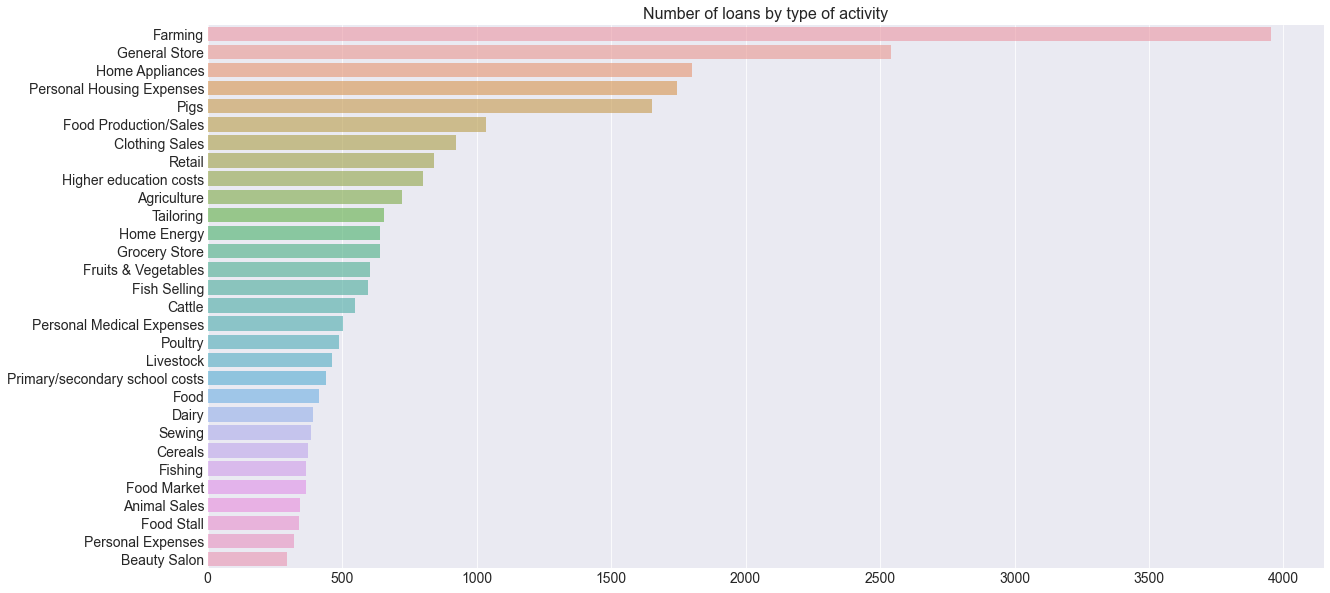

In [16]:
## Plotting number of loans by type of activity
activities = df_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Number of loans by type of activity", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show();

## 4.6. Loans distribution by borrowers gender

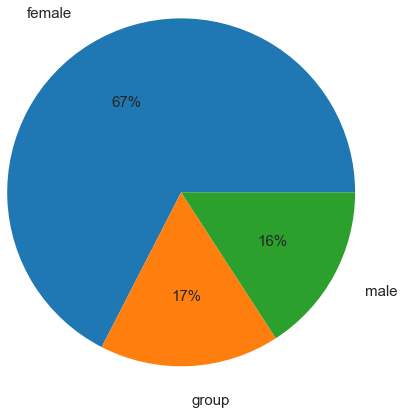

In [17]:
## Plotting piechart of the Loans distribution by borrowers gender
df_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_loans['borrower_genders'] ]

borrowers = df_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=15, autopct='%1.0f%%', labeldistance=1.2, radius=2)

In [18]:
## Groupping loans by country and gender
df_gender_by_country = df_loans[df_loans['country'].isin(countries.index.values)].groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack('borrower_genders').fillna(0).sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

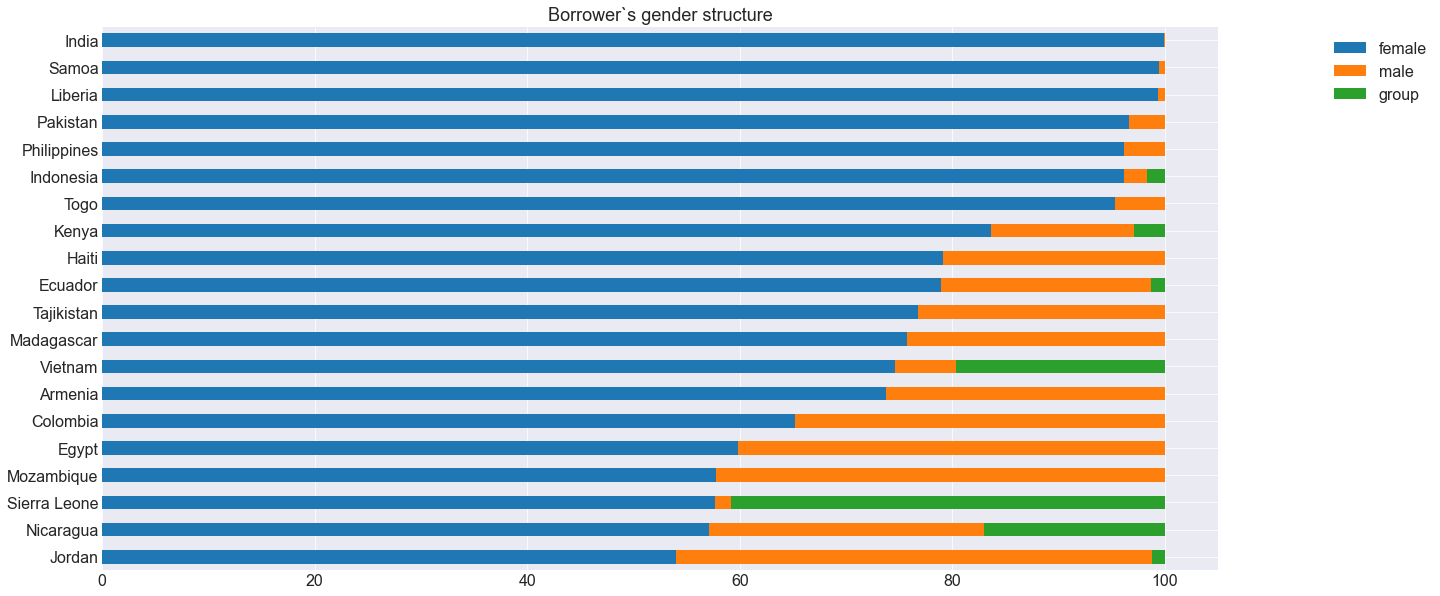

In [19]:
## plotting and groupping loans by country and gender
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Borrower`s gender structure')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

## 4.7. Word clouds are usage of Kiva loans

(-0.5, 1439.5, 1079.5, -0.5)

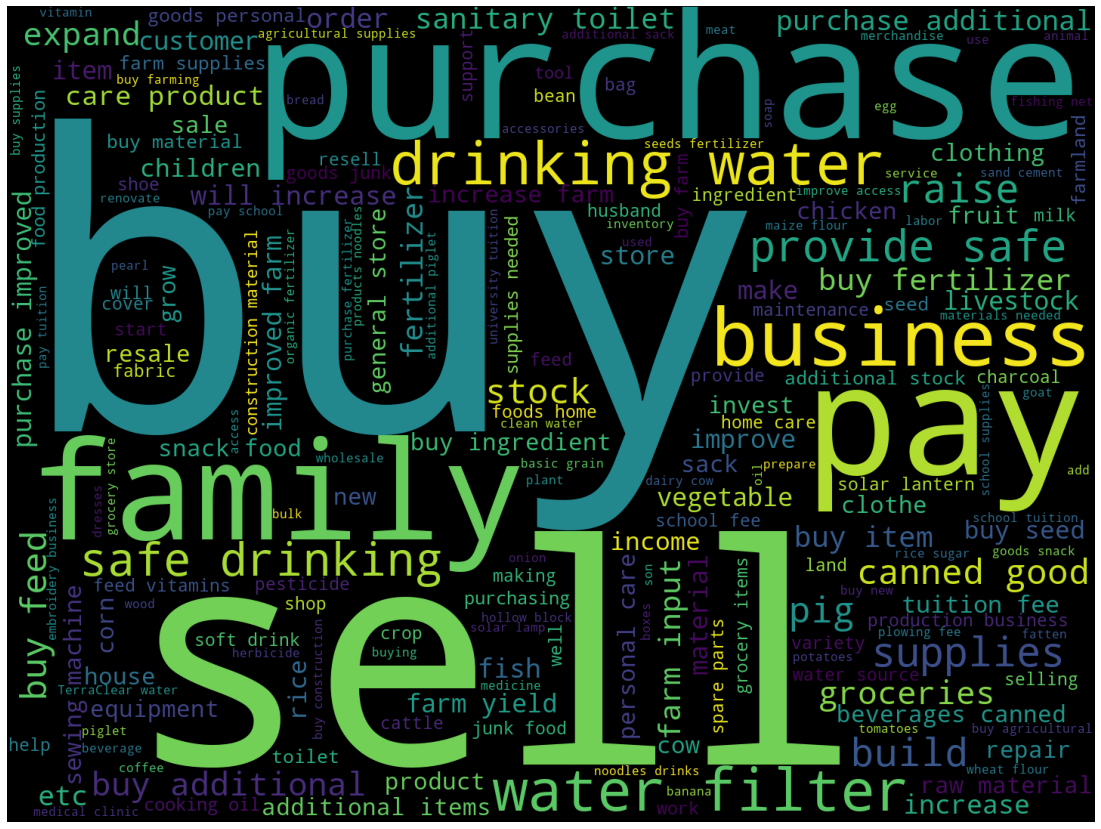

In [20]:
## Word count of loans dataframe
from wordcloud import WordCloud
wordcloud = WordCloud(width=1440, height=1080).generate(" ".join(df_loans.use.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off')

## 4.8. In what currency are loans provided?

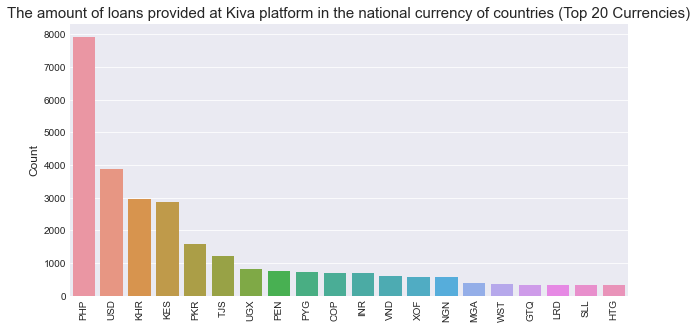

In [21]:
currency = df_loans['currency'].value_counts()

plt.figure(figsize=(10,5))
g = sns.barplot(x=currency.index[:20], y=currency.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("The amount of loans provided at Kiva platform in the national currency of countries (Top 20 Currencies)", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Count", fontsize=12)

plt.show()

## 5. Interactice Charts Using Plotly Libraries

## 5.1. Localisation of borrowers by country

In [22]:
# column of year of loan funded
df_loans['year']  = pd.to_datetime(df_loans['date']).dt.year.astype(str)

# move all data into a one dataframe
dfmean = df_loans.groupby(by = ['country', 'year'])['loan_amount'].mean()
dfmean.name = 'Mean loan amount'
dfsum = df_loans.groupby(by = ['country', 'year'])['loan_amount'].sum()
dfsum.name = 'Total loan amount'
# number of loans in each country in each years
dfsize = df_loans.groupby(by = ['country', 'year'])['loan_amount'].size()
dfsize.name = '# loans'
 ## merge three dataframe inot one dataframe

df_loc = pd.concat( [ dfmean, dfsum, dfsize ], axis = 1, join = 'outer' )

In [23]:
df_loc.head()

,,Mean loan amount,Total loan amount,# loans
country,year,,,
Albania,2017,1191.836735,58400.0,49
Armenia,2017,1357.525952,392325.0,289
Bhutan,2017,10000.000000,10000.0,1
Bolivia,2017,3134.333333,705225.0,225
Brazil,2017,2541.145833,121975.0,48


In [24]:
df_mean = df_loc.reset_index().groupby('country')['# loans'].mean()

In [28]:
## Chart function by plotly libraries
def plot_bar(df_loc, filename = None):
    
    df_loc = df_loc.reset_index()
    # by default, first columns is country, second columns is value
    
    trace = go.Bar(
        y= df_loc.iloc[:,0],
        x=df_loc.iloc[:,1],
        orientation = 'h',
        marker=dict(
            color=df_loc.iloc[:,1],
            autocolorscale = True,
            reversescale = False
        ),
    )
    
    layout = go.Layout(
        title= df_loc.columns[1],
        width=800,
        height=1200,
        )
    data = [trace]
    
    fig = go.Figure(data=data, layout=layout)
    
    if filename == None:
        filename = df_loc.columns[1]
    
    return py.iplot(fig, filename= filename)


In [29]:
## plot loans sum by 40 countries
plot_bar(df_mean.sort_values(ascending = False).head(40) )

## 5.2. Bar Chart for Regions

In [30]:
# plotting Loans by macroregions
plot_bar( regions.sort_values(ascending = False).head(40) )

## 5.3. Mappiing number of loans by country

In [31]:
## Count total loans numbers received by countries
df_map = pd.DataFrame(df_loans['country'].value_counts()).reset_index()
df_map.columns=['country', 'loans']
df_map = df_map.reset_index().drop('index', axis=1)
df_map.head()

,country,loans
0,Philippines,7931
1,Cambodia,3067
2,Kenya,2862
3,Pakistan,1572
4,Tajikistan,1217


In [32]:
## Visualization of the number of received credits on the world map
data = [ dict(
        type = 'choropleth',
        locations = df_map['country'],
        locationmode = 'country names',
        z = df_map['loans'],
        text = df_map['country'],
        colorscale = [[0,"rgb(5, 50, 172)"],[0.85,"rgb(40, 100, 190)"],[0.9,"rgb(70, 140, 245)"],
            [0.94,"rgb(90, 160, 245)"],[0.97,"rgb(106, 177, 247)"],[1,"rgb(220, 250, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = 'Number of Loans Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
ply.iplot(figure, validate=False, filename='countryandloans')

## 5.3. Building Dashboard using Plotly. Dropdown button by sectors and activities



In [33]:
## add columnn month and year format
df_loans['date_column'] = pd.to_datetime(df_loans['date'])
df_loans['month_year'] = df_loans['date_column'].apply(lambda x: x.strftime('%B-%Y')) 


In [34]:
df_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,year,date_column,month_year,month
624129,1286691,325.0,325.0,Farming,Agriculture,to purchase insecticide and fertilizer,PH,Philippines,"Camanga, Tukuran, Zamboanga del Sur",PHP,...,8.0,8,#Parent,female,irregular,2017-04-26,2017,2017-04-26,April-2017,4
624130,1286981,2425.0,2425.0,Weaving,Arts,to buy thread to weave traditional pagnes to s...,BF,Burkina Faso,Ouagadougou,XOF,...,6.0,65,"user_favorite, #Repeat Borrower, #Fabrics, use...",group,irregular,2017-04-26,2017,2017-04-26,April-2017,4
624131,1286174,125.0,125.0,Home Appliances,Personal Use,to buy a water filter to provide safe drinking...,KH,Cambodia,Takeo,KHR,...,8.0,5,"#Eco-friendly, #Health and Sanitation, #Techno...",group,monthly,2017-04-26,2017,2017-04-26,April-2017,4
624132,1287015,800.0,800.0,General Store,Retail,"to buy more rice, sugar, oats, noodles and oth...",EC,Ecuador,Tulcán,USD,...,18.0,14,"#Woman Owned Biz, #Parent",female,monthly,2017-04-26,2017,2017-04-26,April-2017,4
624133,1286696,800.0,800.0,Pigs,Agriculture,to purchase a lot of fodder for all her farm p...,AM,Armenia,Tavush region,USD,...,20.0,17,"#Repeat Borrower, #Animals, #Parent, user_favo...",female,monthly,2017-04-26,2017,2017-04-26,April-2017,4


In [54]:
## Grouping by country and year
loan_month= df_loans.groupby(['country', 'month_year'])['loan_amount'].sum().reset_index().sort_values(by=['country'], ascending=True)

In [55]:
loan_month.head()

,country,month_year,loan_amount
0,Albania,April-2017,13100.0
1,Albania,June-2017,5975.0
2,Albania,May-2017,39325.0
3,Armenia,April-2017,63950.0
4,Armenia,July-2017,15000.0


In [56]:
## Visualization of the number of received credits on the world map
d = [ dict(
        type = 'choropleth',
        locations = loan_month['country'],
        locationmode = 'country names',
        z = loan_month['loan_amount'],
        text = loan_month['country'],
        colorscale = [[0,"rgb(5, 50, 172)"],[0.85,"rgb(40, 100, 190)"],[0.9,"rgb(70, 140, 245)"],
            [0.94,"rgb(90, 160, 245)"],[0.97,"rgb(106, 177, 247)"],[1,"rgb(220, 250, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = '<b>Total amount of Loan($) provided by Month for 3 months (April, 2017 to July 2017)</b>',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

# create the empty dropdown menu
updatemenus = list([dict(buttons=list()), 
                    dict(direction='down',
                         showactive=True)])
months = len(loan_month.month_year.unique()) + 1


for n, month in enumerate(loan_month.month_year.unique()):
    # add a trace for each year
    d.append(dict(
        type = 'choropleth',
        locations = loan_month[loan_month.month_year==month]['country'],
        locationmode = 'country names',
        z = loan_month[loan_month.month_year==month]['loan_amount'],
        text = loan_month[loan_month.month_year==month]['country'],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Loan Amount'),
      visible=False))

    # add each year to the dropdown    
    visible_traces = [False] * months
    visible_traces[n + 1] = True
    updatemenus[0]['buttons'].append(dict(args=[{'visible': visible_traces}],
                                          label=month,
                                          method='update'))

# add a dropdown entry to reset the map    
updatemenus[0]['buttons'].append(dict(args=[{'visible': [True] + [False] *  (months - 1)}],
                                      label='reset',
                                      method='update'))

layout['updatemenus'] = updatemenus
fig = dict( data=d, layout=layout )
py.iplot(fig, validate=False, filename='state-loanamnt' )

In [37]:

## Grouping by country and activities
loan_activity = df_loans.groupby(['country', 'activity'])['loan_amount'].sum().reset_index().sort_values(by=['country'], ascending=True)

In [38]:
loan_activity.head()

,country,activity,loan_amount
0,Albania,Agriculture,3750.0
15,Albania,Used Clothing,1650.0
14,Albania,Tailoring,1275.0
13,Albania,Services,2125.0
12,Albania,Personal Medical Expenses,7050.0


In [39]:
## Visualization of the number of received credits on the world map
d = [ dict(
        type = 'choropleth',
        locations = loan_activity['country'],
        locationmode = 'country names',
        z = loan_activity['loan_amount'],
        text = loan_activity['country'],
        colorscale = [[0,"rgb(5, 50, 172)"],[0.85,"rgb(40, 100, 190)"],[0.9,"rgb(70, 140, 245)"],
            [0.94,"rgb(90, 160, 245)"],[0.97,"rgb(106, 177, 247)"],[1,"rgb(220, 250, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = '<b>Total amount of Loan($) provided by Activity for 3 months (April, 2017 to July 2017)</b>',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

# create the empty dropdown menu
updatemenus = list([dict(buttons=list()), 
                    dict(direction='down',
                         showactive=True)])
activities = len(loan_activity.activity.unique()) + 1


for n, activity in enumerate(loan_activity.activity.unique()):
    # add a trace for each year
    d.append(dict(
        type = 'choropleth',
        locations = loan_activity[loan_activity.activity==activity]['country'],
        locationmode = 'country names',
        z = loan_activity[loan_activity.activity==activity]['loan_amount'],
        text = loan_activity[loan_activity.activity==activity]['country'],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Loan Amount'),
      visible=False))

    # add each year to the dropdown    
    visible_traces = [False] * activities
    visible_traces[n + 1] = True
    updatemenus[0]['buttons'].append(dict(args=[{'visible': visible_traces}],
                                          label=activity,
                                          method='update'))

# add a dropdown entry to reset the map    
updatemenus[0]['buttons'].append(dict(args=[{'visible': [True] + [False] *  (activities - 1)}],
                                      label='reset',
                                      method='update'))

layout['updatemenus'] = updatemenus
fig = dict( data=d, layout=layout )
py.iplot(fig, validate=False, filename='state-loanamnt' )


###### ------------------------#########

In [40]:
## Grouping by sectors
loan_sector = df_loans.groupby(['country', 'sector'])['loan_amount'].sum().reset_index().sort_values(by=['country'], ascending=True)
## Visualization of the number of received credits on the world map
d = [ dict(
        type = 'choropleth',
        locations = loan_sector['country'],
        locationmode = 'country names',
        z = loan_sector['loan_amount'],
        text = loan_sector['country'],
        colorscale = [[0,"rgb(5, 50, 172)"],[0.85,"rgb(40, 100, 190)"],[0.9,"rgb(70, 140, 245)"],
            [0.94,"rgb(90, 160, 245)"],[0.97,"rgb(106, 177, 247)"],[1,"rgb(220, 250, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Loans'),
      ) ]

layout = dict(
    title = '<b>Total amount of Loan($) provided by Sectors for three months (April, 2017 to July 2017)</b>',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

# create the empty dropdown menu
updatemenus = list([dict(buttons=list()), 
                    dict(direction='down',
                         showactive=True)])
sectors = len(loan_sector.sector.unique()) + 1


for n, sector in enumerate(loan_sector.sector.unique()):
    # add a trace for each year
    d.append(dict(
        type = 'choropleth',
        locations = loan_sector[loan_sector.sector==sector]['country'],
        locationmode = 'country names',
        z = loan_sector[loan_sector.sector==sector]['loan_amount'],
        text = loan_sector[loan_sector.sector==sector]['country'],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Loan Amount'),
      visible=False))

    # add each year to the dropdown    
    visible_traces = [False] * sectors
    visible_traces[n + 1] = True
    updatemenus[0]['buttons'].append(dict(args=[{'visible': visible_traces}],
                                          label=sector,
                                          method='update'))

# add a dropdown entry to reset the map    
updatemenus[0]['buttons'].append(dict(args=[{'visible': [True] + [False] *  (sectors - 1)}],
                                      label='reset',
                                      method='update'))

layout['updatemenus'] = updatemenus
fig = dict( data=d, layout=layout )
py.iplot(fig, validate=False, filename='state-loanamnt' )


## 5.4. Loans by sector

In [41]:
## Plotting loans by sector
df_sector = df_loans[ [u'country', u'year', u'activity', u'sector', u'loan_amount']]
## Visualization in the form of piechart
trace = go.Pie(sort = False,labels=df_sector.groupby('sector').size().index.tolist(), values=list(df_sector.groupby('sector').size().values))
fig = {
    'data': [trace],
    'layout': {'title': '# loans by sector'}
     }

py.iplot(fig)

In [42]:
## Visualization in the form of piechart by total amount by sector
trace = go.Pie(sort = False,labels=df_sector.groupby('sector')['loan_amount'].sum().index.tolist(), values=list(df_sector.groupby('sector')['loan_amount'].sum().values))
fig = {
    'data': [trace],
    'layout': {'title': 'Total loan amount by sector'}
     }

py.iplot(fig)

In [43]:
## Loans by sector
Y=df_loans.sector.value_counts().index[::-1]
X=df_loans.sector.value_counts().values[::-1]
data = go.Bar(
    x = X,
    y = Y,
    orientation = 'h',
    marker=dict(
        color=X,
        colorscale = 'Jet',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Loans by Sector',
    width=900,
    height=600,
    )
figure = go.Figure(data=[data], layout=layout)
ply.iplot(figure, filename="SectorLoans")

## 5.5. Loans by Activity

In [44]:
## Loans by activity using Plotly libraries
Y=df_loans.activity.value_counts().index[::-1]
X=df_loans.activity.value_counts().values[::-1]
data = go.Bar(
    x = X,
    y = Y,
    orientation = 'h',
    marker=dict(
        color=X,
        colorscale = 'Jet',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Loans by Activity',
    width=850,
    height=1000,
    )
figure = go.Figure(data=[data], layout=layout)
ply.iplot(figure, filename="LoansSeries")

## Borrowers by Gender

In [45]:
## Plotting piechart using Plotly by gender
df_loans['borrower_genders']=[elem if elem in ['female','male'] else 'group' for elem in df_loans['borrower_genders'] ]
#to replace values such as "woman, woman, woman, man"

borrowers = df_loans['borrower_genders'].value_counts()
labels = (np.array(borrowers.index))
values = (np.array((borrowers / borrowers.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Borrowers' genders"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Borrowers_genders")

## 5.8 Repayment of loans

In [46]:
# borrower_genders 	repayment_interval
Y=df_loans.repayment_interval.value_counts().index[::-1]
X=df_loans.repayment_interval.value_counts().values[::-1]
data = go.Bar(
    x = X,
    y = Y,
    orientation = 'h',
    marker=dict(
        color=X,
        colorscale = 'Jet',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Loans distribution by Gender',
    width=900,
    height=600,
    )
fig = go.Figure(data=[data], layout=layout)
ply.iplot(fig, filename="Gender")

## System Testing

## 1. Missing values Test

In [47]:
## test missing values
assert df_loans['activity'].isna().sum()<1 

## 2. Duplicates Test

In [48]:
# Tests for the presence of duplicate values;
assert len(df_loans['id'].unique())==df_loans.shape[0]
assert df_loans.groupby(['date','id']).size().max()==1

## 3.Tests for the unique value of the variable Id;

In [49]:
# Tests for the unique value of the variable Id;
len(df_loans) == len(df_loans['id'].unique())

True

## 4. Value Ranges Test

In [70]:
## Test to check values of each column of dataframe whether its contains numeric values only
pd.to_numeric(df_loans['lender_count'], errors='coerce').notnull().all()

True

## Basic Test Structure : unittest defines tests by the following two ways : Manage test “fixtures” using code. test itself.

In [71]:
import unittest

class SimpleTest(unittest.TestCase):

	# Returns True or False.
	def test(self):		
		self.assertTrue(True)

if __name__ == '__main__':
	unittest.main()

E
ERROR: C:\Users\altynbek\AppData\Roaming\jupyter\runtime\kernel-b54cbc0e-f75b-4a9e-909b-ab1227e9434d (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\altynbek\AppData\Roaming\jupyter\runtime\kernel-b54cbc0e-f75b-4a9e-909b-ab1227e9434d'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

C:\Users\altynbek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [72]:
exit